## <p style="font-family:newtimeroman;font-size:150%;text-align:center;">Brain Tumor Detection using<br>EfficientNetB0, ResNet101, and Xception</p>

# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Introduction</p>

In my previous exploration of the Brain Tumor dataset ([Brain Tumor Detection using Tensorflow CNN](https://www.kaggle.com/code/anitarostami/brain-tumor-detection-using-tensorflow-cnn#notebook-container)), I delved into Image Classification using CNNs and compared augmented and unaugmented models. While both approaches provided insights, the unaugmented model shown potential for balancing accuracy and computational efficiency . However, due to the dataset's size limits, reaching ideal accuracy remained difficult. In this new notebook, I switch to Transfer Learning and use pre-trained models like EfficientNetB0, ResNet101, and Xception to significantly enhance classification accuracy.

<div class="alert alert-block alert-info"> <b>NOTE</b> I hope you found value and insights in this notebook. If you have any suggestions or thoughts, please feel free to share them. If you enjoyed the content, consider giving it an upvote. Thank you! </div>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. DATA PREPRATION](#2)
    
* [2. TRANSFER LEARNING](#3)
    
* [3. EfficientNetB0](#4)
    
* [4. ResNet101](#5)   
      
* [6. Xception](#6)
    
* [7. CONCLUSION](#7)

<a id="1"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Importing Libraries</p>

In [1]:
!pip install mplcyberpunk

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
import cv2
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm

from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-05-05 20:08:11.212942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 20:08:11.213064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 20:08:11.340767: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/Training/no_tumor/image(84).jpg
/kaggle/input/Training/no_tumor/image(44).jpg
/kaggle/input/Training/no_tumor/image(245).jpg
/kaggle/input/Training/no_tumor/6.jpg
/kaggle/input/Training/no_tumor/image(238).jpg
/kaggle/input/Training/no_tumor/image(196).jpg
/kaggle/input/Training/no_tumor/image(108).jpg
/kaggle/input/Training/no_tumor/image(310).jpg
/kaggle/input/Training/no_tumor/image (5).jpg
/kaggle/input/Training/no_tumor/image(186).jpg
/kaggle/input/Training/no_tumor/image(29).jpg
/kaggle/input/Training/no_tumor/image(140).jpg
/kaggle/input/Training/no_tumor/image(224).jpg
/kaggle/input/Training/no_tumor/image (61).jpg
/kaggle/input/Training/no_tumor/image(173).jpg
/kaggle/input/Training/no_tumor/image(52).jpg
/kaggle/input/Training/no_tumor/image (52).jpg
/kaggle/input/Training/no_tumor/image(174).jpg
/kaggle/input/Training/no_tumor/image(203).jpg
/kaggle/input/Training/no_tumor/image(33).jpg
/kaggle/input/Training/no_tumor/image(283).jpg
/kaggle/input/Training/no_tu

<a id="2"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Data Preperation</p>

In [3]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 150
for i in labels:
    folderPath = os.path.join('../input/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 90.07it/s]


## Data visualization

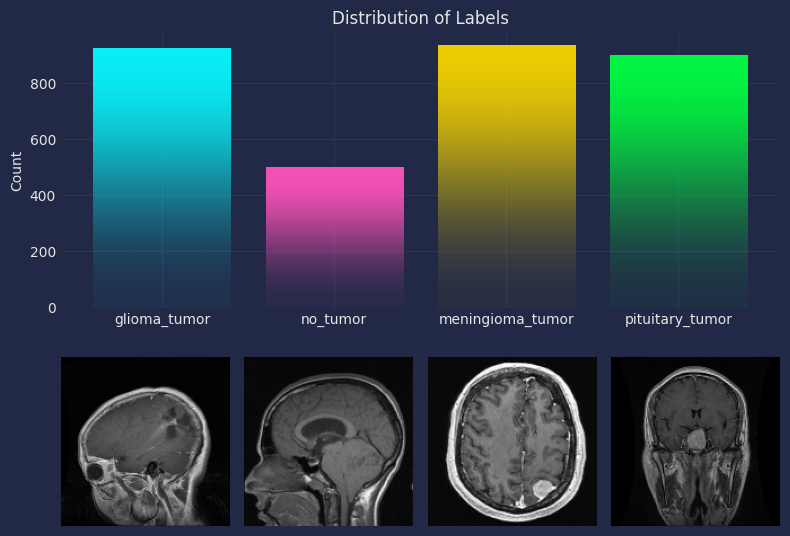

In [4]:
# Calculate the bar plot for each label
label_counts = {label: np.sum(y_train == label) for label in labels}

# Plot the bar plot and sample images in one chart
plt.figure(figsize=(8, 6))

colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
# plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Plot sample images from each label
k = 0
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            plt.subplot(2, 4, k + 5) 
            plt.imshow(X_train[j])
            plt.axis('off')
            k += 1
            break
        j += 1
        
plt.tight_layout()
plt.show()


### Dataset Split: Train and Test

In [5]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

### One-Hot Encoding Labels

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

<a id="3"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Transfer Learning</p>

Transfer learning uses knowledge learned from training on one task to improve learning on another, which is especially beneficial when data is limited. The model can learn more quickly and avoid overfitting by using learned features from a related task. It works by starting with a pre-trained model's base layers, identifying transfer layers capturing relevant information, and fine-tuning these layers with new task data to adapt the model efficiently. This method is particularly useful in deep learning for tasks involving image recognition and classification.

**Fundamental Components and Techniques in Neural Network Training**

1. Dense: A fully connected layer that learns complicated patterns in data by connecting all neurons in the previous and subsequent layers.

2. GlobalAveragePooling2D: A pooling layer that determines the average value of each feature map across spatial dimensions, lowering spatial dimensions and keeping crucial information.

3. Dropout: a regularization technique that randomly sets a fraction of input units to zero during training, preventing overfitting and requiring the model to learn resilient features.

4. BatchNormalization: This technique normalizes each layer's activations to stabilize training and reduce internal covariate shift, resulting in faster convergence and improved generalization.

5. Callbacks: Callbacks are TensorFlow/Keras functions that can do specific actions during training, such as storing the model, adjusting learning rates, or halting training based on conditions.

6. Early Stopping: A callback technique that halts training when a monitored metric stops improving, preventing overfitting and conserving computational resources.

<a id="4"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">EfficientNet</p>

* EfficientNet-b0, trained on the huge ImageNet dataset, has learned how to classify images in 1000 different object categories, ranging from ordinary items like keyboards and pencils to numerous animals. Furthermore, EfficientNet models are notable for their efficient architecture, which achieves high accuracy with less parameters than traditional models such as ResNet-101.

* EfficientNet uses a compound scaling approach to consistently scale depth, width, and resolution. Its stem, the first processing layer, consists of a 3x3 Conv2D with stride 2, Batch Normalization, and Swish activation. The Conv2D layer is essential, detecting features and forming complex patterns crucial for CNNs in image recognition tasks. Filters of size 3x3 traverse the input, capturing spatial hierarchies such as edges and textures, while a stride of 2 downsamples, reducing computational load and aiding feature extraction in subsequent layers. This layer's role in the feature hierarchy comprises low-level feature extraction, which contributes to the recognition of complicated features deeper in the network.

In [8]:
# Load the EfficientNetB0 model pretrained on ImageNet without the top layers
efficientnetB0 = tf.keras.applications.EfficientNetB0(weights='imagenet',
                                                      include_top=False,
                                                      input_shape=(image_size, image_size, 3))


# Build the custom model on top of the EfficientNetB0 base
model = efficientnetB0.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(1024,activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientnetB0.input, outputs = model)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 5,365,415 (20.47 MB)

 Trainable params: 5,323,392 (20.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [10]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model 
checkpoint = ModelCheckpoint("efficientnetB0.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, 
                              min_delta=0.0001, verbose=1)

In [11]:
history = model.fit(X_train,y_train,validation_split = 0.1, epochs = 12, verbose = 1,
                    batch_size = 32, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12


I0000 00:00:1714939827.934438      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.7213 - loss: 0.7255
Epoch 1: val_accuracy improved from -inf to 0.74830, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 174s 961ms/step - accuracy: 0.7224 - loss: 0.7233 - val_accuracy: 0.7483 - val_loss: 0.9627 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9340 - loss: 0.1934
Epoch 2: val_accuracy improved from 0.74830 to 0.85714, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9340 - loss: 0.1935 - val_accuracy: 0.8571 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9196 - loss: 0.2182
Epoch 3: val_accuracy did not improve from 0.85714
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9198 - loss: 0.2178 - val_accuracy: 0.8367 - val_loss: 0.6689 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9628 - loss: 0.1029
Epoch 4: val

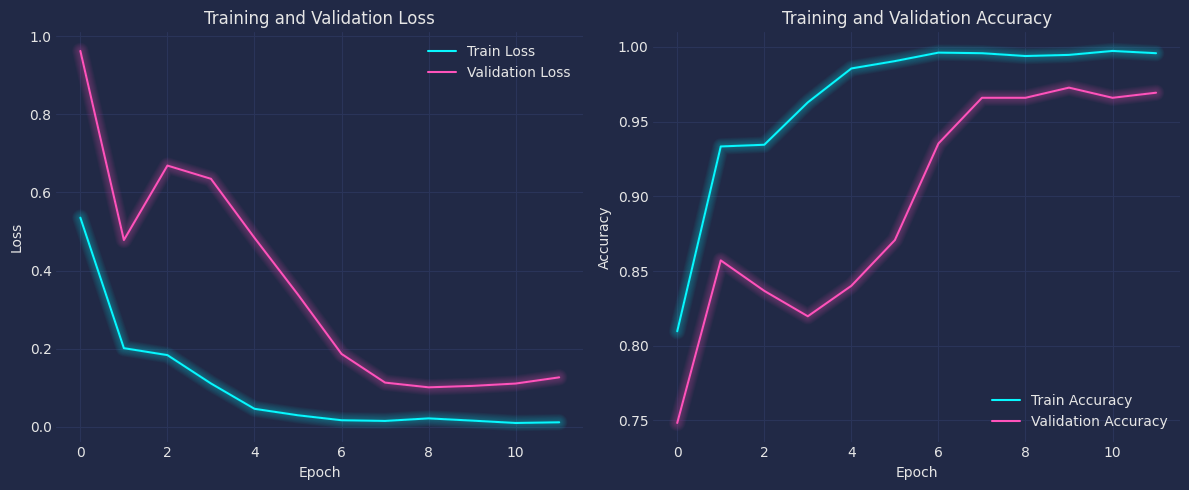

In [12]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Evaluation</p>

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 808ms/step


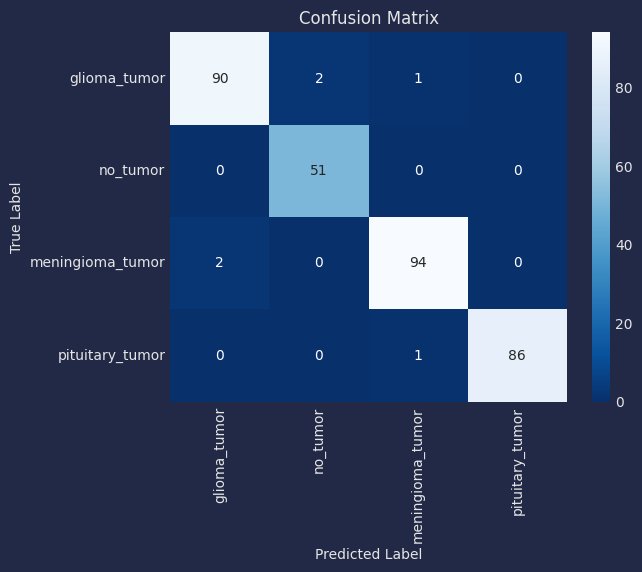

In [13]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.96      1.00      0.98        51
           2       0.98      0.98      0.98        96
           3       1.00      0.99      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted label: meningioma_tumor 
Actual label: meningioma_tumor 
Confidence: 99.97%



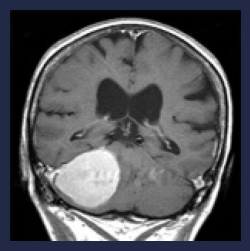

In [15]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class]  

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()

<a id="5"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">ResNet101</p>

ResNet-101, a 101-layer deep convolutional neural network, offers a pretrained version trained on over a million images from the ImageNet database. It excels in classifying images over 1000 object categories, demonstrating its adaptability in recognizing different objects and animals. ResNet-101, with an image input size of 224-by-224, uses extensive feature representations, making it a strong choice for a variety of image classification problems.

In [16]:
# Load the ResNet101 model pretrained on ImageNet without the top layers
resnet = tf.keras.applications.ResNet101(weights='imagenet', include_top=False,
                                         input_shape=(image_size, image_size, 3))

# Build the custom model on top of the ResNet101 base

model = resnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=resnet.input, outputs = model)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [17]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 42,666,372 (162.76 MB)

 Trainable params: 42,561,028 (162.36 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [18]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model 
checkpoint = ModelCheckpoint("efficientnetB0.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, 
                              min_delta=0.0001, verbose=1)

In [19]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =15, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/15


W0000 00:00:1714940148.535470      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.5998 - loss: 1.2289

W0000 00:00:1714940221.557245      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714940228.810664      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.15986, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.6009 - loss: 1.2255 - val_accuracy: 0.1599 - val_loss: 2.6515 - learning_rate: 0.0010
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.8103 - loss: 0.5183
Epoch 2: val_accuracy improved from 0.15986 to 0.36395, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.8105 - loss: 0.5178 - val_accuracy: 0.3639 - val_loss: 7.1365 - learning_rate: 0.0010
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9145 - loss: 0.2451
Epoch 3: val_accuracy improved from 0.36395 to 0.66667, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.9144 - loss: 0.2453 - val_accuracy: 0.6667 - val_loss: 0.8258 - learning_rate: 0.0010
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9202 - loss: 0.2272
Epoch 4: val_accuracy did not improve fro

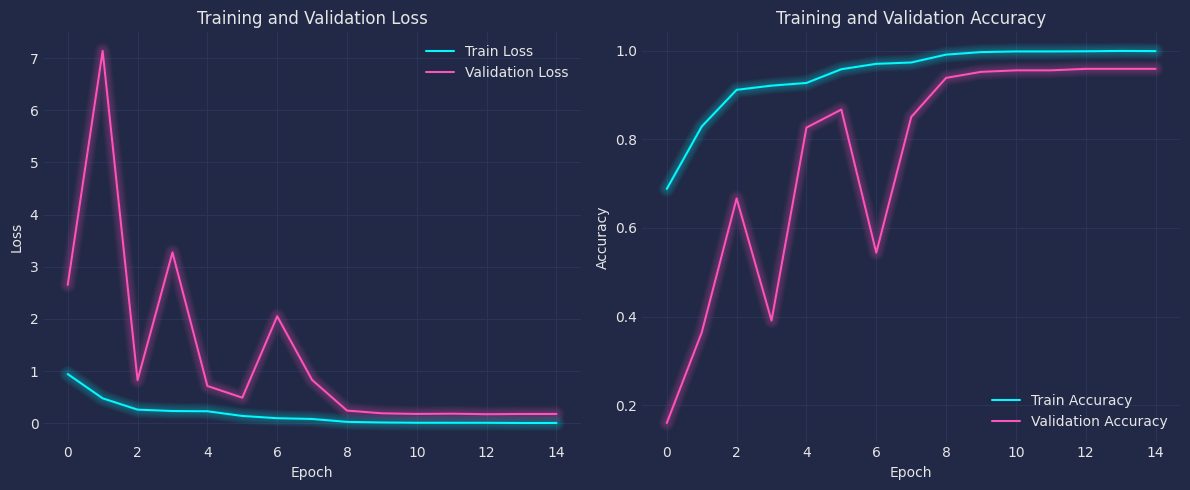

In [20]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Evaluation</p>

 5/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

W0000 00:00:1714940479.220032      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


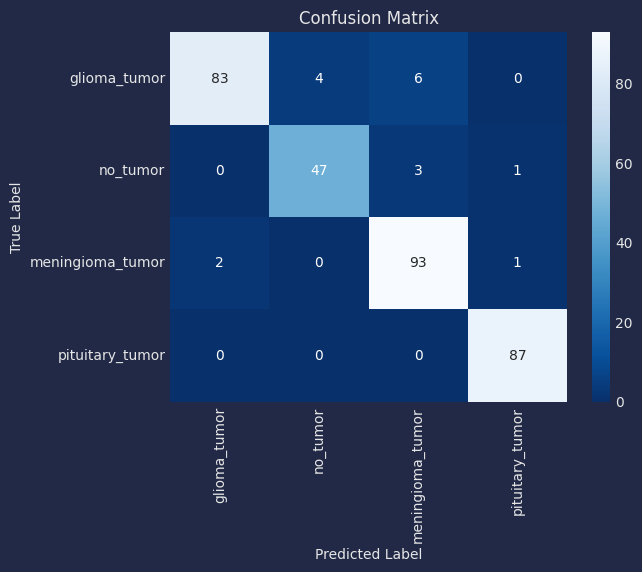

In [21]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        93
           1       0.92      0.92      0.92        51
           2       0.91      0.97      0.94        96
           3       0.98      1.00      0.99        87

    accuracy                           0.95       327
   macro avg       0.95      0.95      0.95       327
weighted avg       0.95      0.95      0.95       327



## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted label: no_tumor 
Actual label: no_tumor 
Confidence: 100.00%



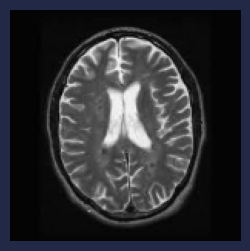

In [23]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class]  

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()

<a id="6"></a>
# <p style="background-color:#003166;font-family:newtimeroman;color:#ffffff;font-size:150%;text-align:center;border-radius:50px 10px;">Xception</p>

Xception, a revolutionary CNN architecture, incorporates depthwise separable convolutions, which reduces parameters and computational cost while maintaining efficacy. It uses separable convolutional blocks, an entry-exit flow structure, and skip connections similar to ResNet to provide efficient training and hierarchical feature learning. Key approaches include global depthwise convolutions for context understanding, data augmentation, batch normalization for stability, and transfer learning potential from ImageNet. With 71 layers, pretrained Xception performs at ImageNet classification, demonstrating its efficiency and adaptability in deep learning tasks.

In [24]:
# Load the Xception model pretrained on ImageNet without the top layers
xception = tf.keras.applications.Xception(weights='imagenet', include_top=False,
                                          input_shape=(image_size, image_size, 3))

# Build the custom model on top of the Xception base
model = xception.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(1536,activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=xception.input, outputs = model)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [25]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 74, 74,    │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 74, 74,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 74, 74,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 72, 72,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 72, 72,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 72, 72,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 72, 72,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 72, 72,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 72, 72,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 72, 72,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 72, 72,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 36, 36,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 36, 36,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 36, 36,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 36, 36,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 36, 36,    │          0 │ add[0][0]       

 Total params: 24,014,892 (91.61 MB)

 Trainable params: 23,960,364 (91.40 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [26]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model 
checkpoint = ModelCheckpoint("efficientnetB0.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, 
                              min_delta=0.0001, verbose=1)

In [27]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7181 - loss: 0.7572
Epoch 1: val_accuracy improved from -inf to 0.50680, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 100s 552ms/step - accuracy: 0.7192 - loss: 0.7550 - val_accuracy: 0.5068 - val_loss: 11.7750 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8974 - loss: 0.3291
Epoch 2: val_accuracy improved from 0.50680 to 0.64966, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - accuracy: 0.8974 - loss: 0.3290 - val_accuracy: 0.6497 - val_loss: 1.5854 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9277 - loss: 0.2264
Epoch 3: val_accuracy improved from 0.64966 to 0.90136, saving model to efficientnetB0.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 145ms/step - accuracy: 0.9278 - loss: 0.2262 - val_accuracy: 0.9014 - val_loss: 0.4345 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 

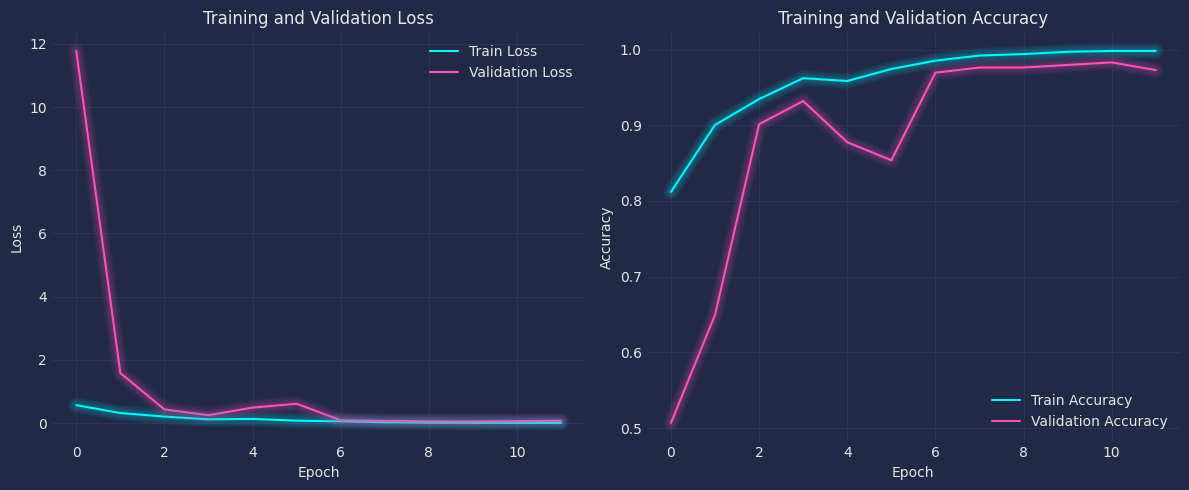

In [28]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
mplcyberpunk.make_lines_glow()

plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Evaluation</p>

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step


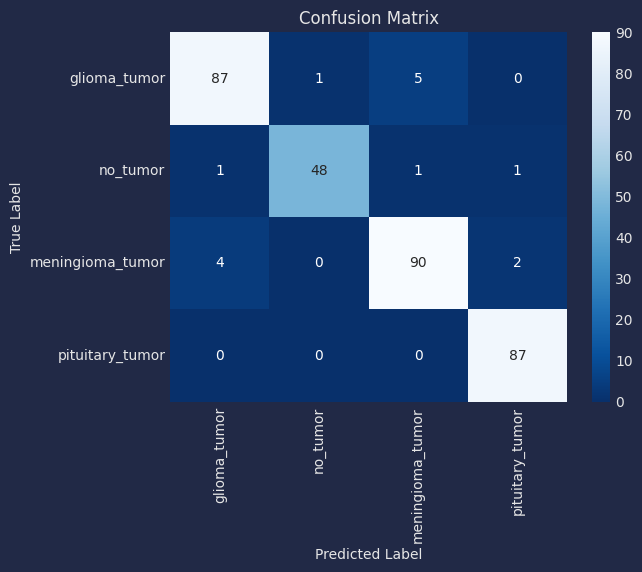

In [29]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        93
           1       0.98      0.94      0.96        51
           2       0.94      0.94      0.94        96
           3       0.97      1.00      0.98        87

    accuracy                           0.95       327
   macro avg       0.96      0.95      0.96       327
weighted avg       0.95      0.95      0.95       327



## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted label: no_tumor 
Actual label: no_tumor 
Confidence: 99.99%



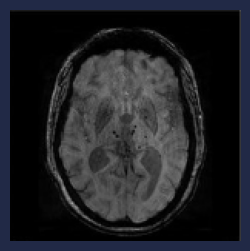

In [31]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]  
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)  
actual_label = labels[actual_class] 

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')  
plt.show()


<a id="7"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;color:#ffffff;text-align:center;border-radius:50px 10px;">Conclusion</p>

Through the exploration of Transfer Learning models, including EfficientNet-b0, ResNet101, VGG 19, and Xception, this notebook has showcased the power of leveraging pre-existing knowledge to enhance classification accuracy. These models offer a robust framework for tackling the challenges posed by small datasets, exhibiting improved performance and paving the way for more accurate brain tumor detection.

# <p><center style="color:#003166;font-family:newtimeroman;;">Thank You!</center></p>